<a href="https://colab.research.google.com/github/jamogh/h1n1_vaccine_prediction/blob/main/h1n1vaccine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/h1n1_vaccine_prediction.csv")
print(df)


       unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    

In [4]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
columns_with_nulls = df.columns[df.isnull().any()].tolist()

mean_values = df[columns_with_nulls].mean()

df[columns_with_nulls] = df[columns_with_nulls].fillna(mean_values)

<ipython-input-7-33ae87ca2682>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df[columns_with_nulls].mean()


In [8]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [18]:
df.drop(columns=['qualification','income_level','marital_status','housing_status','employment','unique_id','h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','cont_child_undr_6_mnths','is_health_worker','has_health_insur','race','census_msa'])

,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,sex,no_of_adults,no_of_children,h1n1_vaccine
0,0.000000,0.000000,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,Female,0.0,0.0,0
1,0.000000,0.000000,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,Male,0.0,0.0,0
2,0.220312,0.329735,1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,Male,2.0,0.0,0
3,0.000000,1.000000,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,Female,0.0,0.0,0
4,0.000000,0.000000,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Female,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.000000,0.000000,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Female,0.0,0.0,0
26703,1.000000,1.000000,0.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,Male,1.0,0.0,0
26704,0.000000,0.000000,0.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Female,0.0,0.0,0
26705,0.000000,0.000000,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Female,1.0,0.0,0


In [22]:
dummy_df = pd.get_dummies(df, columns=['age_bracket', 'sex'])

print(dummy_df)

       unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                    0.0   
1                    

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv("/content/drive/MyDrive/h1n1_vaccine_prediction.csv")

In [25]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [26]:
df.shape

(26707, 34)

In [27]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: xlabel='is_h1n1_vacc_effective', ylabel='count'>

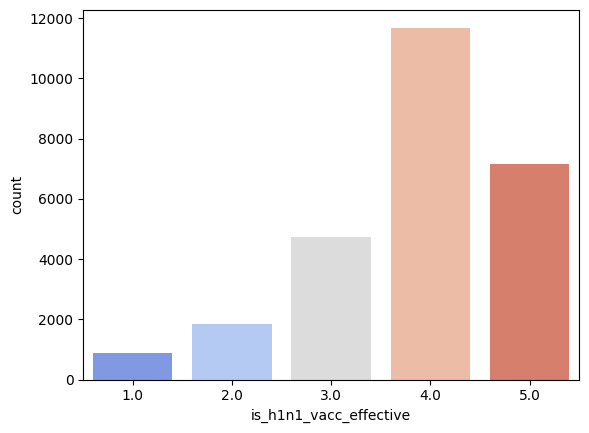

In [29]:
sns.countplot(x="is_h1n1_vacc_effective",data=df,palette="coolwarm")

In [30]:
df["is_h1n1_vacc_effective"].value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

<Axes: xlabel='is_h1n1_vacc_effective', ylabel='count'>

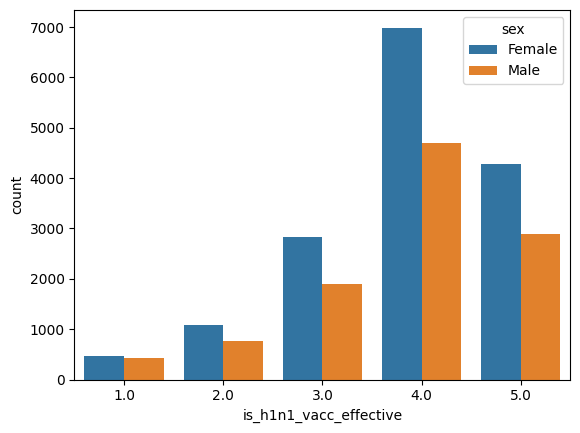

In [32]:
sns.countplot(x="is_h1n1_vacc_effective",hue="sex",data=df)

In [33]:
pd.crosstab(df["is_h1n1_vacc_effective"],df["sex"])

sex,Female,Male
is_h1n1_vacc_effective,,
1.0,462,424
2.0,1089,769
3.0,2828,1895
4.0,6989,4694
5.0,4278,2888


<Axes: xlabel='is_h1n1_vacc_effective', ylabel='count'>

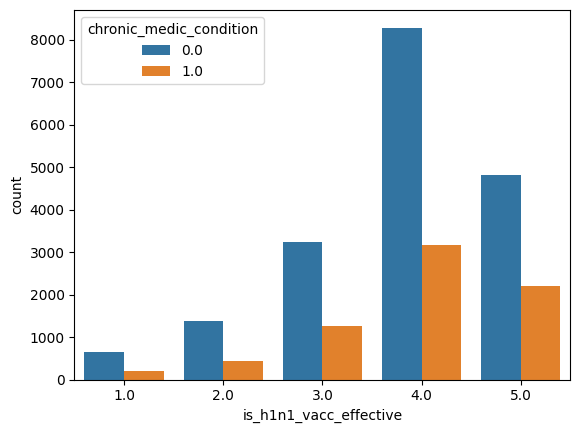

In [34]:
sns.countplot(x="is_h1n1_vacc_effective",hue="chronic_medic_condition",data=df)

<Axes: xlabel='chronic_medic_condition', ylabel='age_bracket'>

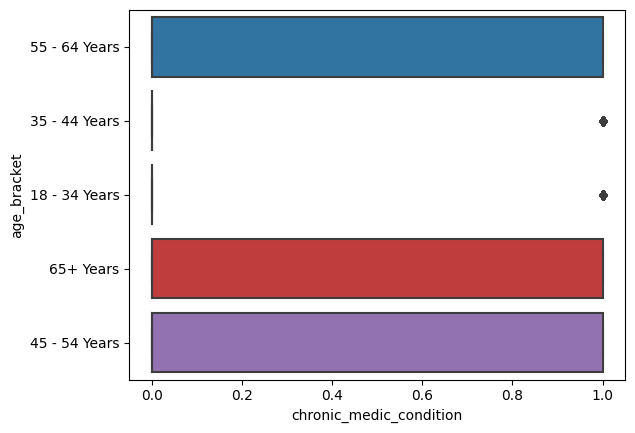

In [35]:
sns.boxplot(x="chronic_medic_condition",y="age_bracket",data=df)

In [37]:
df=df.dropna()
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,1


import numpy as np
from google.colab import autoviz
df_7185922198952732051 = autoviz.get_df('df_7185922198952732051')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7185922198952732051, *['unique_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2827159434083316564 = autoviz.get_df('df_2827159434083316564')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2827159434083316564, *['h1n1_worry'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1136842404840110750 = autoviz.get_df('df_1136842404840110750')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1136842404840110750, *['h1n1_awareness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_717783348744756653 = autoviz.get_df('df_717783348744756653')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_717783348744756653, *['contact_avoidance'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8606295974348497625 = autoviz.get_df('df_8606295974348497625')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8606295974348497625, *['unique_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2128563155685396199 = autoviz.get_df('df_2128563155685396199')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2128563155685396199, *['h1n1_worry'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7813605437213501286 = autoviz.get_df('df_7813605437213501286')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7813605437213501286, *['h1n1_awareness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7538796005814564911 = autoviz.get_df('df_7538796005814564911')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7538796005814564911, *['contact_avoidance'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8662924019206782248 = autoviz.get_df('df_8662924019206782248')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8662924019206782248, *['age_bracket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2825436038367357327 = autoviz.get_df('df_2825436038367357327')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2825436038367357327, *['qualification'], **{})
chart

import numpy as np
from google.colab import autoviz
df_852573153289632335 = autoviz.get_df('df_852573153289632335')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_852573153289632335, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1887751544288648618 = autoviz.get_df('df_1887751544288648618')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1887751544288648618, *['income_level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3471259564582819251 = autoviz.get_df('df_3471259564582819251')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3471259564582819251, *[[['unique_id', 'h1n1_worry'], ['h1n1_worry', 'h1n1_awareness'], ['h1n1_awareness', 'contact_avoidance'], ['contact_avoidance', 'wash_hands_frequently']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8108814935852310377 = autoviz.get_df('df_8108814935852310377')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8108814935852310377, *['age_bracket', 'qualification'], **{})
chart

import numpy as np
from google.colab import autoviz
df_339127709841153152 = autoviz.get_df('df_339127709841153152')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_339127709841153152, *['qualification', 'sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2468314986889993388 = autoviz.get_df('df_2468314986889993388')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2468314986889993388, *['sex', 'income_level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2427119649380497097 = autoviz.get_df('df_2427119649380497097')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2427119649380497097, *['income_level', 'marital_status'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5505933187330426457 = autoviz.get_df('df_5505933187330426457')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5505933187330426457, *['unique_id', 'age_bracket'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4674920491824860448 = autoviz.get_df('df_4674920491824860448')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4674920491824860448, *['unique_id', 'qualification'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8828022225753199156 = autoviz.get_df('df_8828022225753199156')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8828022225753199156, *['unique_id', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4218597233248345898 = autoviz.get_df('df_4218597233248345898')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4218597233248345898, *['unique_id', 'income_level'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5503941376305687896 = autoviz.get_df('df_5503941376305687896')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5503941376305687896, *['unique_id', 'h1n1_worry', 'age_bracket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5148535959931783610 = autoviz.get_df('df_5148535959931783610')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5148535959931783610, *['unique_id', 'h1n1_worry', 'qualification'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5004189794989624908 = autoviz.get_df('df_5004189794989624908')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5004189794989624908, *['unique_id', 'h1n1_worry', 'sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5951754153935756928 = autoviz.get_df('df_5951754153935756928')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5951754153935756928, *['unique_id', 'h1n1_worry', 'income_level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3171213459065791150 = autoviz.get_df('df_3171213459065791150')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3171213459065791150, *['unique_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5982288072317557902 = autoviz.get_df('df_5982288072317557902')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5982288072317557902, *['h1n1_worry'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8583582381049988776 = autoviz.get_df('df_8583582381049988776')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8583582381049988776, *['h1n1_awareness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5090049214025773673 = autoviz.get_df('df_5090049214025773673')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5090049214025773673, *['contact_avoidance'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8053719814352023432 = autoviz.get_df('df_8053719814352023432')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8053719814352023432, *['unique_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7774330601409163987 = autoviz.get_df('df_7774330601409163987')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7774330601409163987, *['h1n1_worry'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7945721220231734271 = autoviz.get_df('df_7945721220231734271')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7945721220231734271, *['h1n1_awareness'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7697069741632345496 = autoviz.get_df('df_7697069741632345496')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7697069741632345496, *['contact_avoidance'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1624355479451548655 = autoviz.get_df('df_1624355479451548655')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1624355479451548655, *['age_bracket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2280113742641557505 = autoviz.get_df('df_2280113742641557505')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2280113742641557505, *['qualification'], **{})
chart

import numpy as np
from google.colab import autoviz
df_335747198731871837 = autoviz.get_df('df_335747198731871837')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_335747198731871837, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7741093265129486437 = autoviz.get_df('df_7741093265129486437')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7741093265129486437, *['income_level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9152746558393018680 = autoviz.get_df('df_9152746558393018680')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_9152746558393018680, *[[['unique_id', 'h1n1_worry'], ['h1n1_worry', 'h1n1_awareness'], ['h1n1_awareness', 'contact_avoidance'], ['contact_avoidance', 'wash_hands_frequently']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6132418148841851709 = autoviz.get_df('df_6132418148841851709')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6132418148841851709, *['age_bracket', 'qualification'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7957037881921765570 = autoviz.get_df('df_7957037881921765570')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7957037881921765570, *['qualification', 'sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4224344775777461876 = autoviz.get_df('df_4224344775777461876')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4224344775777461876, *['sex', 'income_level'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4292614079590658930 = autoviz.get_df('df_4292614079590658930')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4292614079590658930, *['income_level', 'marital_status'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3561041948233998303 = autoviz.get_df('df_3561041948233998303')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3561041948233998303, *['unique_id', 'age_bracket'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6097986734686628857 = autoviz.get_df('df_6097986734686628857')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6097986734686628857, *['unique_id', 'qualification'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2146417328897236913 = autoviz.get_df('df_2146417328897236913')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2146417328897236913, *['unique_id', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4015889373194728626 = autoviz.get_df('df_4015889373194728626')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4015889373194728626, *['unique_id', 'income_level'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3246483893751539850 = autoviz.get_df('df_3246483893751539850')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3246483893751539850, *['unique_id', 'h1n1_worry', 'age_bracket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8785010577721096703 = autoviz.get_df('df_8785010577721096703')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8785010577721096703, *['unique_id', 'h1n1_worry', 'qualification'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2298263055646933266 = autoviz.get_df('df_2298263055646933266')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2298263055646933266, *['unique_id', 'h1n1_worry', 'sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1604988614650110028 = autoviz.get_df('df_1604988614650110028')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1604988614650110028, *['unique_id', 'h1n1_worry', 'income_level'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [38]:
df=pd.get_dummies(columns=["age_bracket","sex"],data=df)

In [39]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Female,sex_Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0,0,0,0,1,0,1,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0,0,1,0,0,0,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,2.0,0.0,1,0,0,1,0,0,1,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0,0,0,0,1,0,0,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,0.0,1,0,0,1,0,0,0,1


In [40]:
df=df.drop(columns=['qualification','income_level','marital_status','housing_status','employment','unique_id','h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','cont_child_undr_6_mnths','is_health_worker','has_health_insur','race','census_msa'])

In [41]:
df.head()

,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_18 - 34 Years,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Female,sex_Male
0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,0,1,0,1,0
1,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,0,1,0,0,0,0,1
7,1.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,1,0,0,1,0,0,1,0
9,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0,0,0,0,0,1,0,0,1
10,0.0,0.0,1.0,4.0,1.0,2.0,5.0,4.0,4.0,2.0,0.0,1,0,0,1,0,0,0,1


In [42]:
X=df.drop("is_h1n1_vacc_effective",axis=1)
Y=df["is_h1n1_vacc_effective"]

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [44]:
model_1=LogisticRegression()

In [45]:
model_1.fit(X_train,Y_train)

LogisticRegression()

In [46]:
model_1.score(X_train,Y_train)

0.5669291338582677

In [53]:
model_1.score(X_test,Y_test)

0.5685221814071771

In [54]:
model_2=LogisticRegression()

In [55]:
model_2.fit(X_train,Y_train)

LogisticRegression()

In [56]:
model_2.score(X_train,Y_train)

0.5669291338582677

In [57]:
model_2.score(X_test,Y_test)

0.5685221814071771

In [58]:
predictions=model_2.predict(X_test)

In [59]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(Y_test,predictions)

0.5685221814071771

<Axes: >

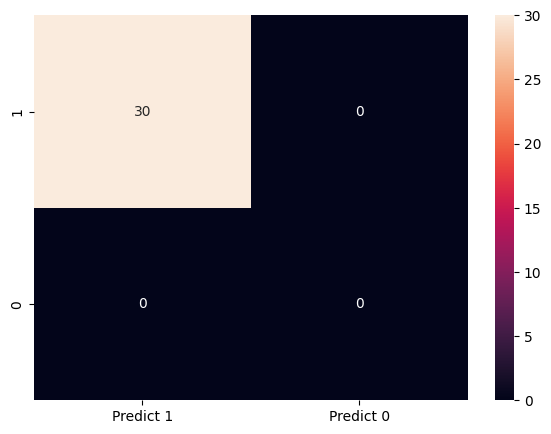

In [61]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
model_5=GradientBoostingRegressor()
model_5.fit(X_train,Y_train)


GradientBoostingRegressor()

In [73]:
model_5.score(X_train,Y_train)

0.36232000668732656

In [74]:
model_5.score(X_test,Y_test)

0.3176195136286346

In [81]:
f=(accuracy_score(Y_test,predictions))*100
print(f,'%')

56.85221814071772 %
